# Proyek Analisis Data: PRSA_Data_Changping_20130301-20170228

- Nama: Ahmad Zakky Arja
- **Email:** d0n24kky@gmail.com
- **ID Dicoding:** ahmad_zakky_arja_17


## Menentukan Pertanyaan Bisnis


- Bagaimana Tren rata-rata konsentrasi polutan dalam waktu 24 jam ?
- Bagaimana Tren rata-rata konsentrasi polutan dalam waktu 5 tahun ?
- Berapa Persentase hari dengan kualitas udara aman dan hari dengan kualitas udara melebihi batas aman ?


## Import Semua Packages/Library yang Digunakan


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling


### Gathering Data


In [4]:
changping_df = pd.read_csv('data/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv', delimiter=',')
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


### Assessing Data


In [5]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**

- Dari 17 parameter yang ada, 5 diantaranya bertipe data Integer, 11 bertipe data Float, dan 2 bertipe data Object. Tetapi jika dilihat lebih teliti ada beberapa parameter yang data nya tidak sesuai dengan jumlah baris keseluruhan dari dataset. Yang berarti ada missing value pada beberapa parameter. Oleh karena itu, kita akan lanjut ke tahap selanjutnya yaitu Cleaning Data untuk membersihkan data kita yang missing value.


In [6]:
print("jumlah duplikasi data :",changping_df.duplicated().sum())

jumlah duplikasi data : 0


### Cleaning Data


In [7]:
changping_df.drop(['No', 'wd'],axis=1,inplace=True)

**Insight:**

- kita hapus parameter wd karena kali ini kita tidak menggunakan parameter nya


In [8]:
changping_df.isna().sum()

year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
WSPM         43
station       0
dtype: int64

**Insight:**

- Dari kode diatas kita bisa melihat bahwa hanya parameter No,year,month,day,hour dan station saja yang tidak memiliki missing value. Sisanya memiliki missing value. Selanjutnya kita akan mengisi missing value nya dengan nilai rata-rata pada setiap parameter data nya.


In [9]:
changping_df['PM2.5'] = changping_df['PM2.5'].fillna(changping_df['PM2.5'].mean())
changping_df['PM10'] = changping_df['PM10'].fillna(changping_df['PM10'].mean())
changping_df['SO2'] = changping_df['SO2'].fillna(changping_df['SO2'].mean())
changping_df['NO2'] = changping_df['NO2'].fillna(changping_df['NO2'].mean())
changping_df['CO'] = changping_df['CO'].fillna(changping_df['CO'].mean())
changping_df['O3'] = changping_df['O3'].fillna(changping_df['O3'].mean())
changping_df['TEMP'] = changping_df['TEMP'].fillna(changping_df['TEMP'].mean())
changping_df['PRES'] = changping_df['PRES'].fillna(changping_df['PRES'].mean())
changping_df['DEWP'] = changping_df['DEWP'].fillna(changping_df['DEWP'].mean())
changping_df['RAIN'] = changping_df['RAIN'].fillna(changping_df['RAIN'].mean())
changping_df['WSPM'] = changping_df['WSPM'].fillna(changping_df['WSPM'].mean())



In [10]:
changping_df.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64

**Insight:**

- Setelah kita jalankan kode diatas dapat terlihat perbedaan nya yaitu parameter yang semula memiliki missing value sekarang sudah terisi semua.


## Exploratory Data Analysis (EDA)


### Explore ...


In [11]:
changping_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,1.177213,3.448752,8.800218,6.922285,71.524179,82.746329,20.786642,29.237672,1078.866266,53.846809,11.356720,10.218370,13.811648,0.752352,1.309005
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,11.500000,48.000000,74.000000,7.000000,37.000000,800.000000,47.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,2016.000000,10.000000,23.000000,17.250000,98.000000,129.000000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**

- kode diatas menampilkan statistik deskriptif setiap parameter pada DataFrame


Rata-rata konsentrasi polutan dalam 24 jam


In [12]:
avg_per_hour = changping_df.groupby(by=['hour']).agg({
    "hour" : "mean",
    "PM2.5" : "mean",
    "PM10" : "mean",
    "SO2" :  "mean",
    "NO2" :  "mean",
    "CO" :  "mean",
    "O3" :  "mean",
    "TEMP" : "mean",
    "PRES" : "mean",
    "DEWP" : "mean",
    "RAIN" : "mean",
    "WSPM" : "mean",
})

data = avg_per_hour
kualitas_udara_per_jam = pd.DataFrame(data)
kualitas_udara_per_jam.head(24)


,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,
0,0.0,72.479050,93.372672,12.542312,44.143973,1190.287933,48.267114,11.399697,1008.203710,1.818146,0.045120,1.441926
1,1.0,71.614711,89.558161,12.219917,41.977682,1213.486286,43.682238,10.964637,1008.169879,1.811845,0.047680,1.464171
2,2.0,69.973781,86.397370,14.339568,40.532621,1112.057410,38.700622,10.558818,1008.138584,1.743471,0.054703,1.413831
3,3.0,67.998695,83.815969,11.395031,40.543952,1119.561970,38.164287,10.186260,1008.059316,1.639634,0.048707,1.418996
4,4.0,65.587539,80.354894,11.327975,41.249452,1098.885131,35.166741,9.865748,1008.098570,1.505274,0.045490,1.408250
5,5.0,63.876108,78.738643,11.610313,42.848781,1126.357748,33.025404,9.706273,1008.203873,1.485436,0.039180,1.436492
6,6.0,63.198764,80.116250,12.060571,43.958001,1204.959728,32.013425,9.859147,1008.488987,1.457430,0.037892,1.413452
7,7.0,64.324774,86.061601,13.040306,47.331728,1245.586631,28.761934,10.739089,1008.793325,1.456069,0.046188,1.492718
8,8.0,67.430592,92.782935,15.156828,49.572217,1307.168227,29.205768,12.075134,1009.046113,1.537448,0.033895,1.612526


Kita lihat korelasi dari DataFrame diatas antara polutan dengan polutan lain dan paramater seperti TEMP, PRES, DEWP, RAIN, dan WSPM.


In [13]:
kualitas_udara_per_jam.corr()

,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,1.000000,0.550401,0.709233,0.326546,0.308550,-0.174085,0.605680,0.544862,-0.454190,-0.013665,0.650399,0.310930
PM2.5,0.550401,1.000000,0.886478,0.543728,0.436312,0.242685,0.317248,0.389024,-0.052555,0.374657,0.615104,0.188914
PM10,0.709233,0.886478,1.000000,0.591085,0.563838,0.206730,0.455714,0.531445,-0.192922,0.226364,0.678680,0.264868
SO2,0.326546,0.543728,0.591085,1.000000,0.020624,0.073909,0.414734,0.753514,-0.126068,-0.421836,-0.034603,0.761539
NO2,0.308550,0.436312,0.563838,0.020624,1.000000,0.771986,-0.373330,-0.304692,0.511871,0.708180,0.609958,-0.515717
CO,-0.174085,0.242685,0.206730,0.073909,0.771986,1.000000,-0.743273,-0.508944,0.900276,0.615699,0.084303,-0.520486
O3,0.605680,0.317248,0.455714,0.414734,-0.373330,-0.743273,1.000000,0.895393,-0.937188,-0.540774,0.243439,0.761934
TEMP,0.544862,0.389024,0.531445,0.753514,-0.304692,-0.508944,0.895393,1.000000,-0.723219,-0.666937,0.062930,0.935741
PRES,-0.454190,-0.052555,-0.192922,-0.126068,0.511871,0.900276,-0.937188,-0.723219,1.000000,0.544671,-0.186838,-0.612784
DEWP,-0.013665,0.374657,0.226364,-0.421836,0.708180,0.615699,-0.540774,-0.666937,0.544671,1.000000,0.552678,-0.834480


**Insight:**

- Parameter PM10 dan RAIN memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter PM2.5
- Parameter PM2.5 dan RAIN memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter PM10
- Parameter TEMP dan WSPM memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter SO2
- Parameter CO dan DEWP memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter NO2
- Parameter NO2 dan PRES memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter CO
- Parameter TEMP dan WSPM memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter O3


In [25]:
avg_per_year = changping_df.groupby(by='year').agg({
    "year" : "mean",
    "PM2.5" : "mean",
    "PM10" : "mean",
    "SO2" :  "mean",
    "NO2" :  "mean",
    "CO" :  "mean",
    "O3" :  "mean",
    "TEMP" : "mean",
    "PRES" : "mean",
    "DEWP" : "mean",
    "RAIN" : "mean",
    "WSPM" : "mean",
}) 
data = avg_per_year
rata_rata_tahunan = pd.DataFrame(data)
rata_rata_tahunan.head()

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,
2013,2013.0,72.637567,91.257159,19.231476,41.251464,1052.052075,61.399195,15.961397,1004.957489,4.471882,0.066068,1.647685
2014,2014.0,79.144216,106.318472,20.958338,45.557611,1195.430974,63.080795,14.172511,1008.153664,1.037260,0.037888,1.868642
2015,2015.0,69.672148,94.153708,11.841341,42.799284,1161.859538,57.912187,13.611578,1007.850727,1.844610,0.082552,1.839283
2016,2016.0,61.778503,86.422490,8.277616,45.548925,1123.589296,53.904720,13.491736,1007.920728,1.646874,0.065326,1.982806
2017,2017.0,80.012286,94.364091,16.417615,50.947550,1524.400162,33.400410,0.543273,1018.308218,-13.957718,0.001839,2.121415


Kita lihat korelasi dari DataFrame diatas antara polutan dengan polutan lain dan paramater seperti TEMP, PRES, DEWP, RAIN, dan WSPM.


In [15]:
rata_rata_tahunan.corr()

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,1.000000,-0.055349,-0.294681,-0.552050,0.829262,0.754649,-0.858107,-0.799229,0.815955,-0.778003,-0.504082,0.953785
PM2.5,-0.055349,1.000000,0.750155,0.839277,0.434819,0.604472,-0.287997,-0.489840,0.510269,-0.542508,-0.735763,0.134974
PM10,-0.294681,0.750155,1.000000,0.726651,0.131416,0.188429,0.242577,0.009755,0.072707,-0.065970,-0.347973,-0.044543
SO2,-0.552050,0.839277,0.726651,1.000000,-0.015845,0.109739,0.177070,-0.006776,0.010931,-0.063870,-0.420634,-0.349901
NO2,0.829262,0.434819,0.131416,-0.015845,1.000000,0.928681,-0.866248,-0.911469,0.942919,-0.929762,-0.891188,0.935209
CO,0.754649,0.604472,0.188429,0.109739,0.928681,1.000000,-0.905796,-0.978395,0.992201,-0.989693,-0.880092,0.821406
O3,-0.858107,-0.287997,0.242577,0.177070,-0.866248,-0.905796,1.000000,0.971840,-0.948166,0.951715,0.740511,-0.823370
TEMP,-0.799229,-0.489840,0.009755,-0.006776,-0.911469,-0.978395,0.971840,1.000000,-0.992686,0.996574,0.842816,-0.819378
PRES,0.815955,0.510269,0.072707,0.010931,0.942919,0.992201,-0.948166,-0.992686,1.000000,-0.996430,-0.859210,0.860101
DEWP,-0.778003,-0.542508,-0.065970,-0.063870,-0.929762,-0.989693,0.951715,0.996574,-0.996430,1.000000,0.878652,-0.822725


**Insight:**

- Parameter SO2 dan PM10 memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter PM2.5
- Parameter PM2.5 dan SO2 memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter PM10
- Parameter PM2.5 dan PM10 memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter SO2
- Parameter PRES dan WSPM memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter NO2
- Parameter PRES dan NO2 memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter CO
- Parameter TEMP dan DEWP memiliki korelasi yang mendekati 1 (hampir sempurna) dengan parameter O3


untuk mengetahui jumlah hari yang kualitas udara nya aman dan jumlah hari yang kualitas udara nya melebihi batas aman, kita buat function dengan ketentuan batasan harian sebagai berikut :

- PM2.5 = 15µg/m3 per hari
- PM10 = 45µg/m3 per hari
- SO2 = 40µg/m3 per hari
- NO2 = 25µg/m3 per hari
- CO = 4µg/m3 per hari
- O3 = 100µg/m3 per hari


In [16]:
def batas_aman_pm25(pm2_5):
    if pm2_5 <= 15:
        return 'Aman'
    else : return 'Melebihi batas aman'

def batas_aman_pm10(pm10):
    if pm10 <= 45:
        return 'Aman'
    else : return 'Melebihi batas aman'

def batas_aman_SO2(SO2):
    if SO2 <= 40:
        return 'Aman'
    else : return 'Melebihi batas aman'

def batas_aman_NO2(NO2):
    if NO2 <= 25:
        return 'Aman'
    else : return 'Melebihi batas aman'

def batas_aman_CO(CO):
    if CO <= 4:
        return 'Aman'
    else : return 'Melebihi batas aman'
def batas_aman_O3(O3):
    if O3 <= 100:
        return 'Aman'
    else : return 'Melebihi batas aman'

print(changping_df['PM2.5'].apply(batas_aman_pm25).value_counts()/24),
print(changping_df['PM10'].apply(batas_aman_pm10).value_counts()/24),
print(changping_df['SO2'].apply(batas_aman_SO2).value_counts()/24),
print(changping_df['NO2'].apply(batas_aman_NO2).value_counts()/24),
print(changping_df['CO'].apply(batas_aman_CO).value_counts()/24),
print(changping_df['O3'].apply(batas_aman_O3).value_counts()/24)


PM2.5
Melebihi batas aman    1151.958333
Aman                    309.041667
Name: count, dtype: float64
PM10
Melebihi batas aman    971.208333
Aman                   489.791667
Name: count, dtype: float64
SO2
Aman                   1319.083333
Melebihi batas aman     141.916667
Name: count, dtype: float64
NO2
Melebihi batas aman    1000.708333
Aman                    460.291667
Name: count, dtype: float64
CO
Melebihi batas aman    1461.0
Name: count, dtype: float64
O3
Aman                   1228.291667
Melebihi batas aman     232.708333
Name: count, dtype: float64


Kita tampung output dari function diatas dengan membuat DataFrame dengan tiga parameter untuk nama polutan, jumlah hari dalam batas aman, dan jumlah hari yang melebihi batas aman. Untuk parameter yang berisi tipe data Integer, jika angka di belakang koma lebih dari atau sama dengan lima maka akan kita bulatkan ke angka selanjutnya. Tetapi jika kurang dari lima maka angka nya bernilai tetap.

contoh :

19.5 akan menjadi 20

20.4 akan tetap bernilai 20


In [17]:

persentase_hari_df = pd.DataFrame({
    "polutan" : ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
    "hari_DBA_Dalam_Batas_Aman" :  [309, 490, 1319, 460, 0, 1228],
    "hari_melebihi_DBA" : [1152, 971, 141, 1001, 1461, 233]})

persentase_hari_df.head(7)

,polutan,hari_DBA_Dalam_Batas_Aman,hari_melebihi_DBA
0,PM2.5,309,1152
1,PM10,490,971
2,SO2,1319,141
3,NO2,460,1001
4,CO,0,1461
5,O3,1228,233


## Visualization & Explanatory Analysis


### Pertanyaan 1:

- Rata-rata konsentrasi polutan dalam waktu 24 jam

  Disini sengaja membuat visualisasi data nya menggunakan kanvas dengan tiga baris dan tiga kolom supaya kita bisa melihat progres peningkatan/penurunan kandungan polutan nya dengan jelas.


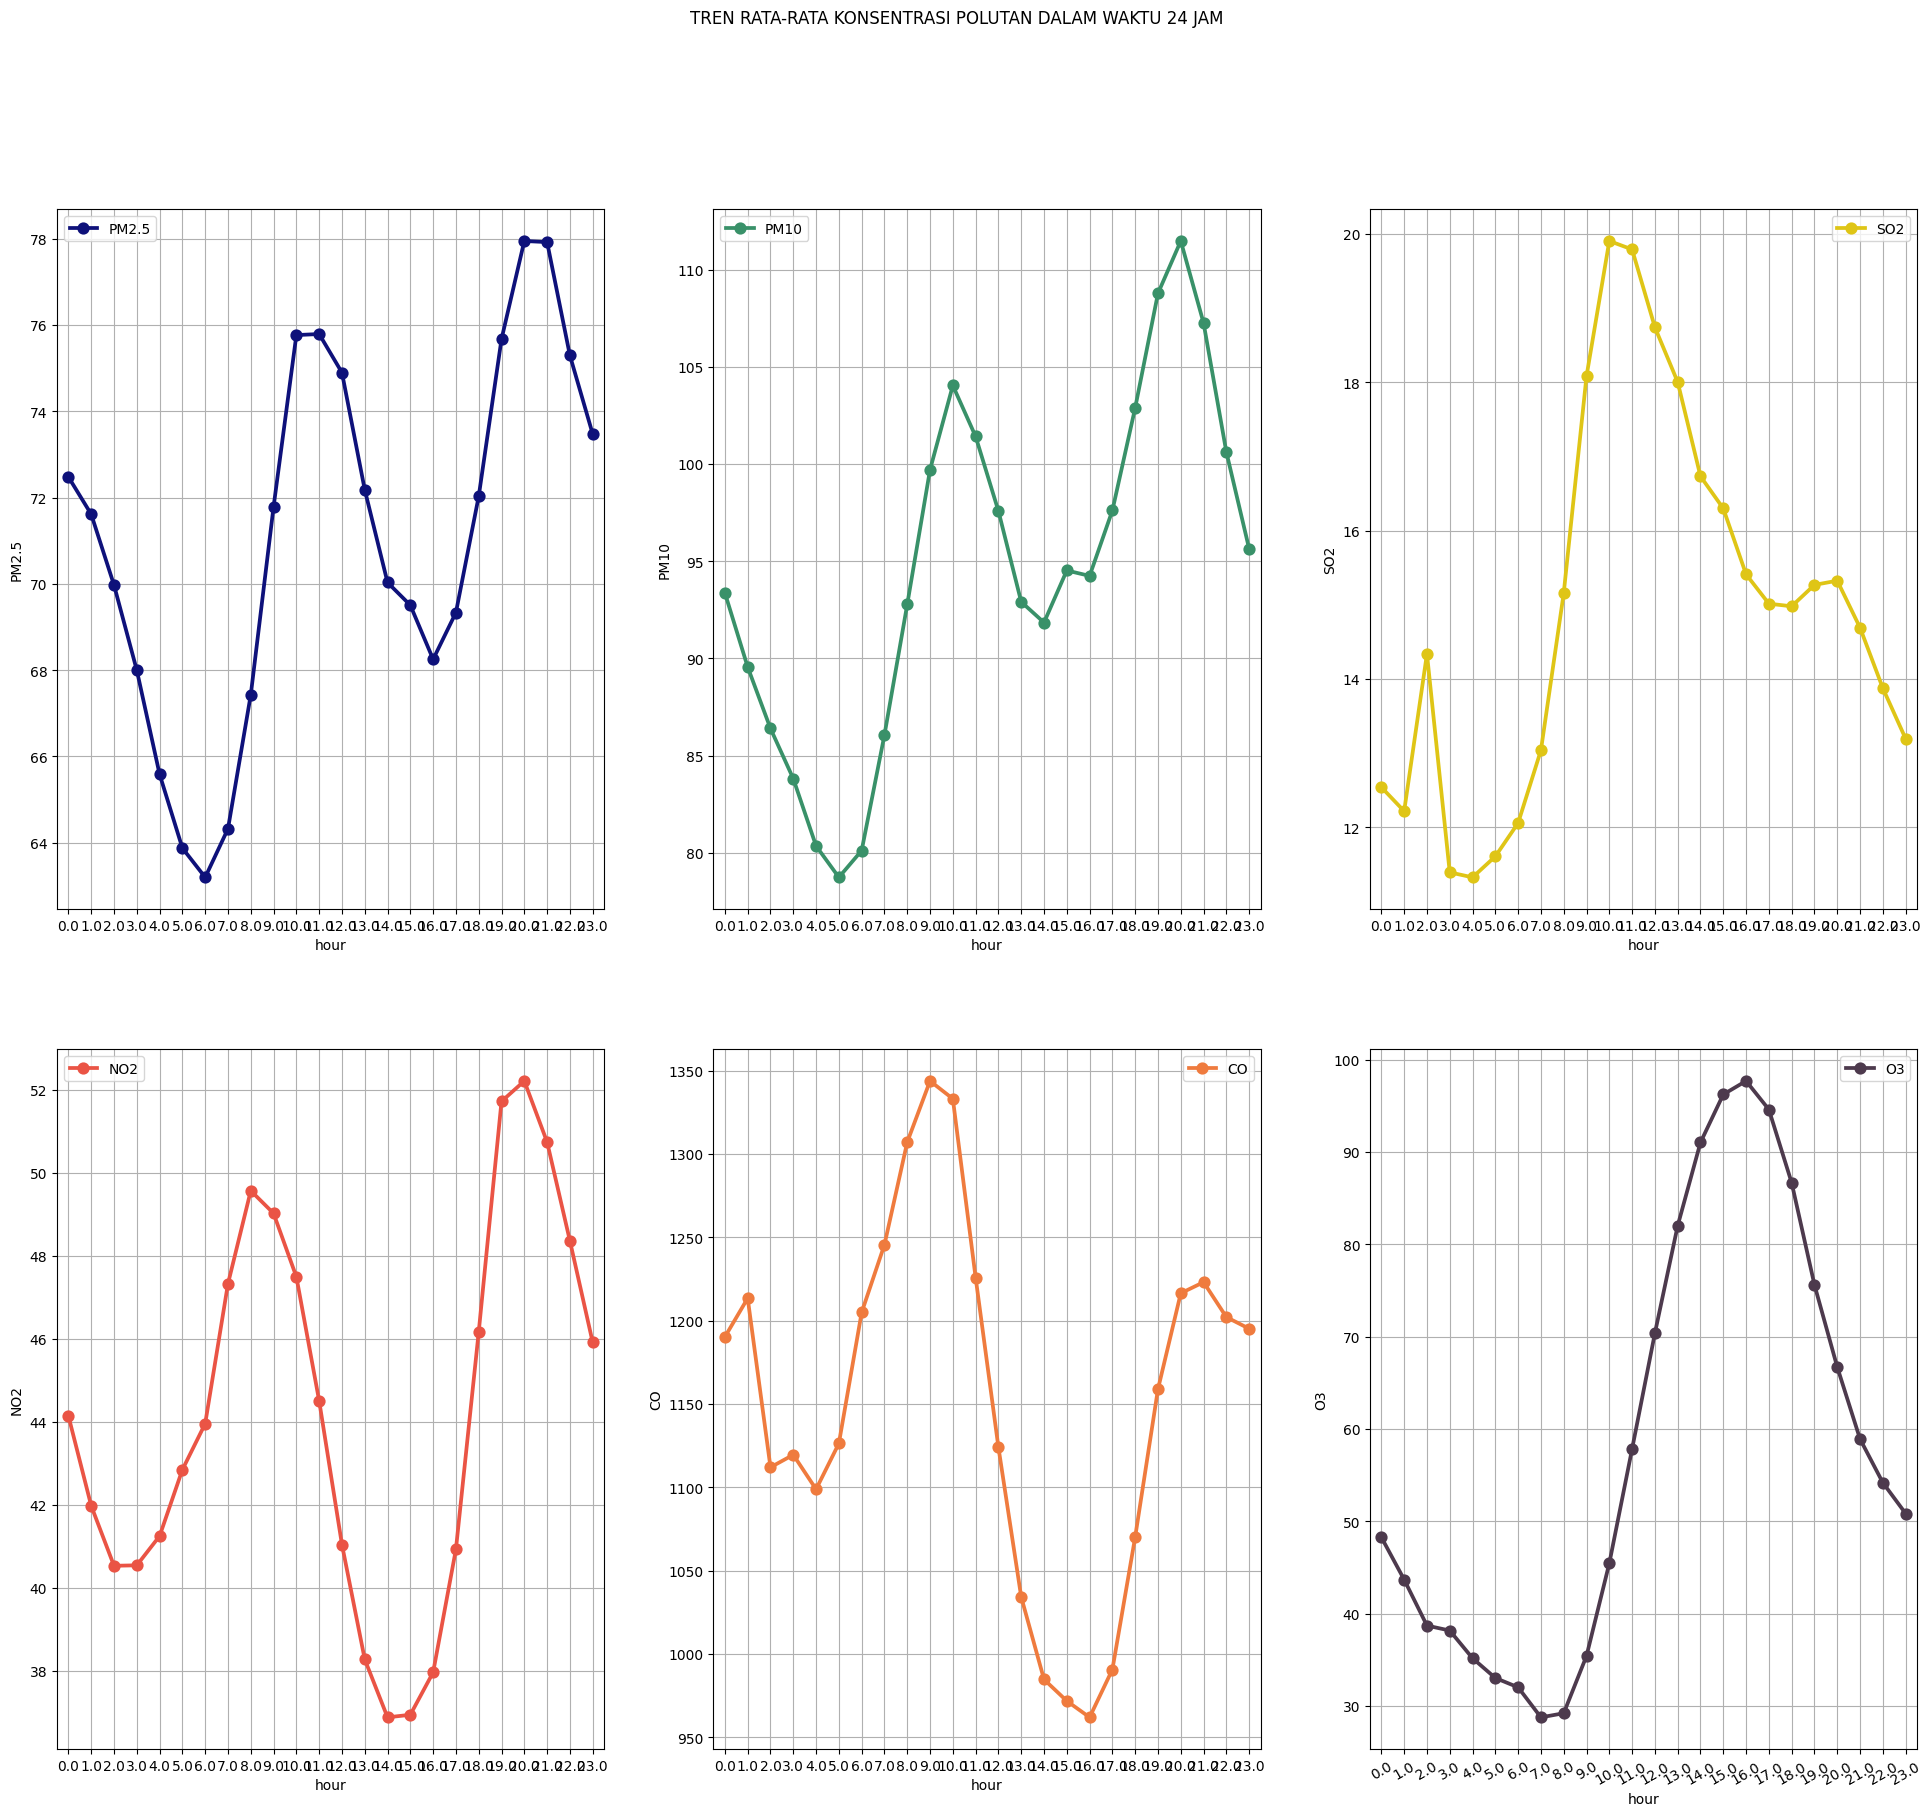

In [18]:
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize=(24, 20))
sns.pointplot(data=avg_per_hour, x='hour', y='PM2.5', label='PM2.5', errorbar=None, color='#0E117A', ax=ax[0,0]).grid(True)
sns.pointplot(data=avg_per_hour, x='hour', y='PM10', label="PM10", errorbar=None, color='#399169', ax=ax[0,1]).grid(True)
sns.pointplot(data=avg_per_hour, x='hour', y='SO2', label="SO2", errorbar=None, color='#DFC516', ax=ax[0,2]).grid(True)
sns.pointplot(data=avg_per_hour, x='hour', y='NO2', label="NO2", errorbar=None, color='#EA5445', ax=ax[1,0]).grid(True)
sns.pointplot(data=avg_per_hour, x='hour', y='CO', label="CO", errorbar=None, color='#EF7B3E', ax=ax[1,1]).grid(True)
sns.pointplot(data=avg_per_hour, x='hour', y='O3', label="O3", errorbar=None, color='#4D3A4D', ax=ax[1,2]).grid(True)

plt.suptitle('Tren rata-rata konsentrasi polutan dalam waktu 24 jam'.upper())
plt.xticks(rotation=30)
plt.show()

### Pertanyaan 2:

- Tren rata-rata konsentrasi polutan dalam 5 tahun


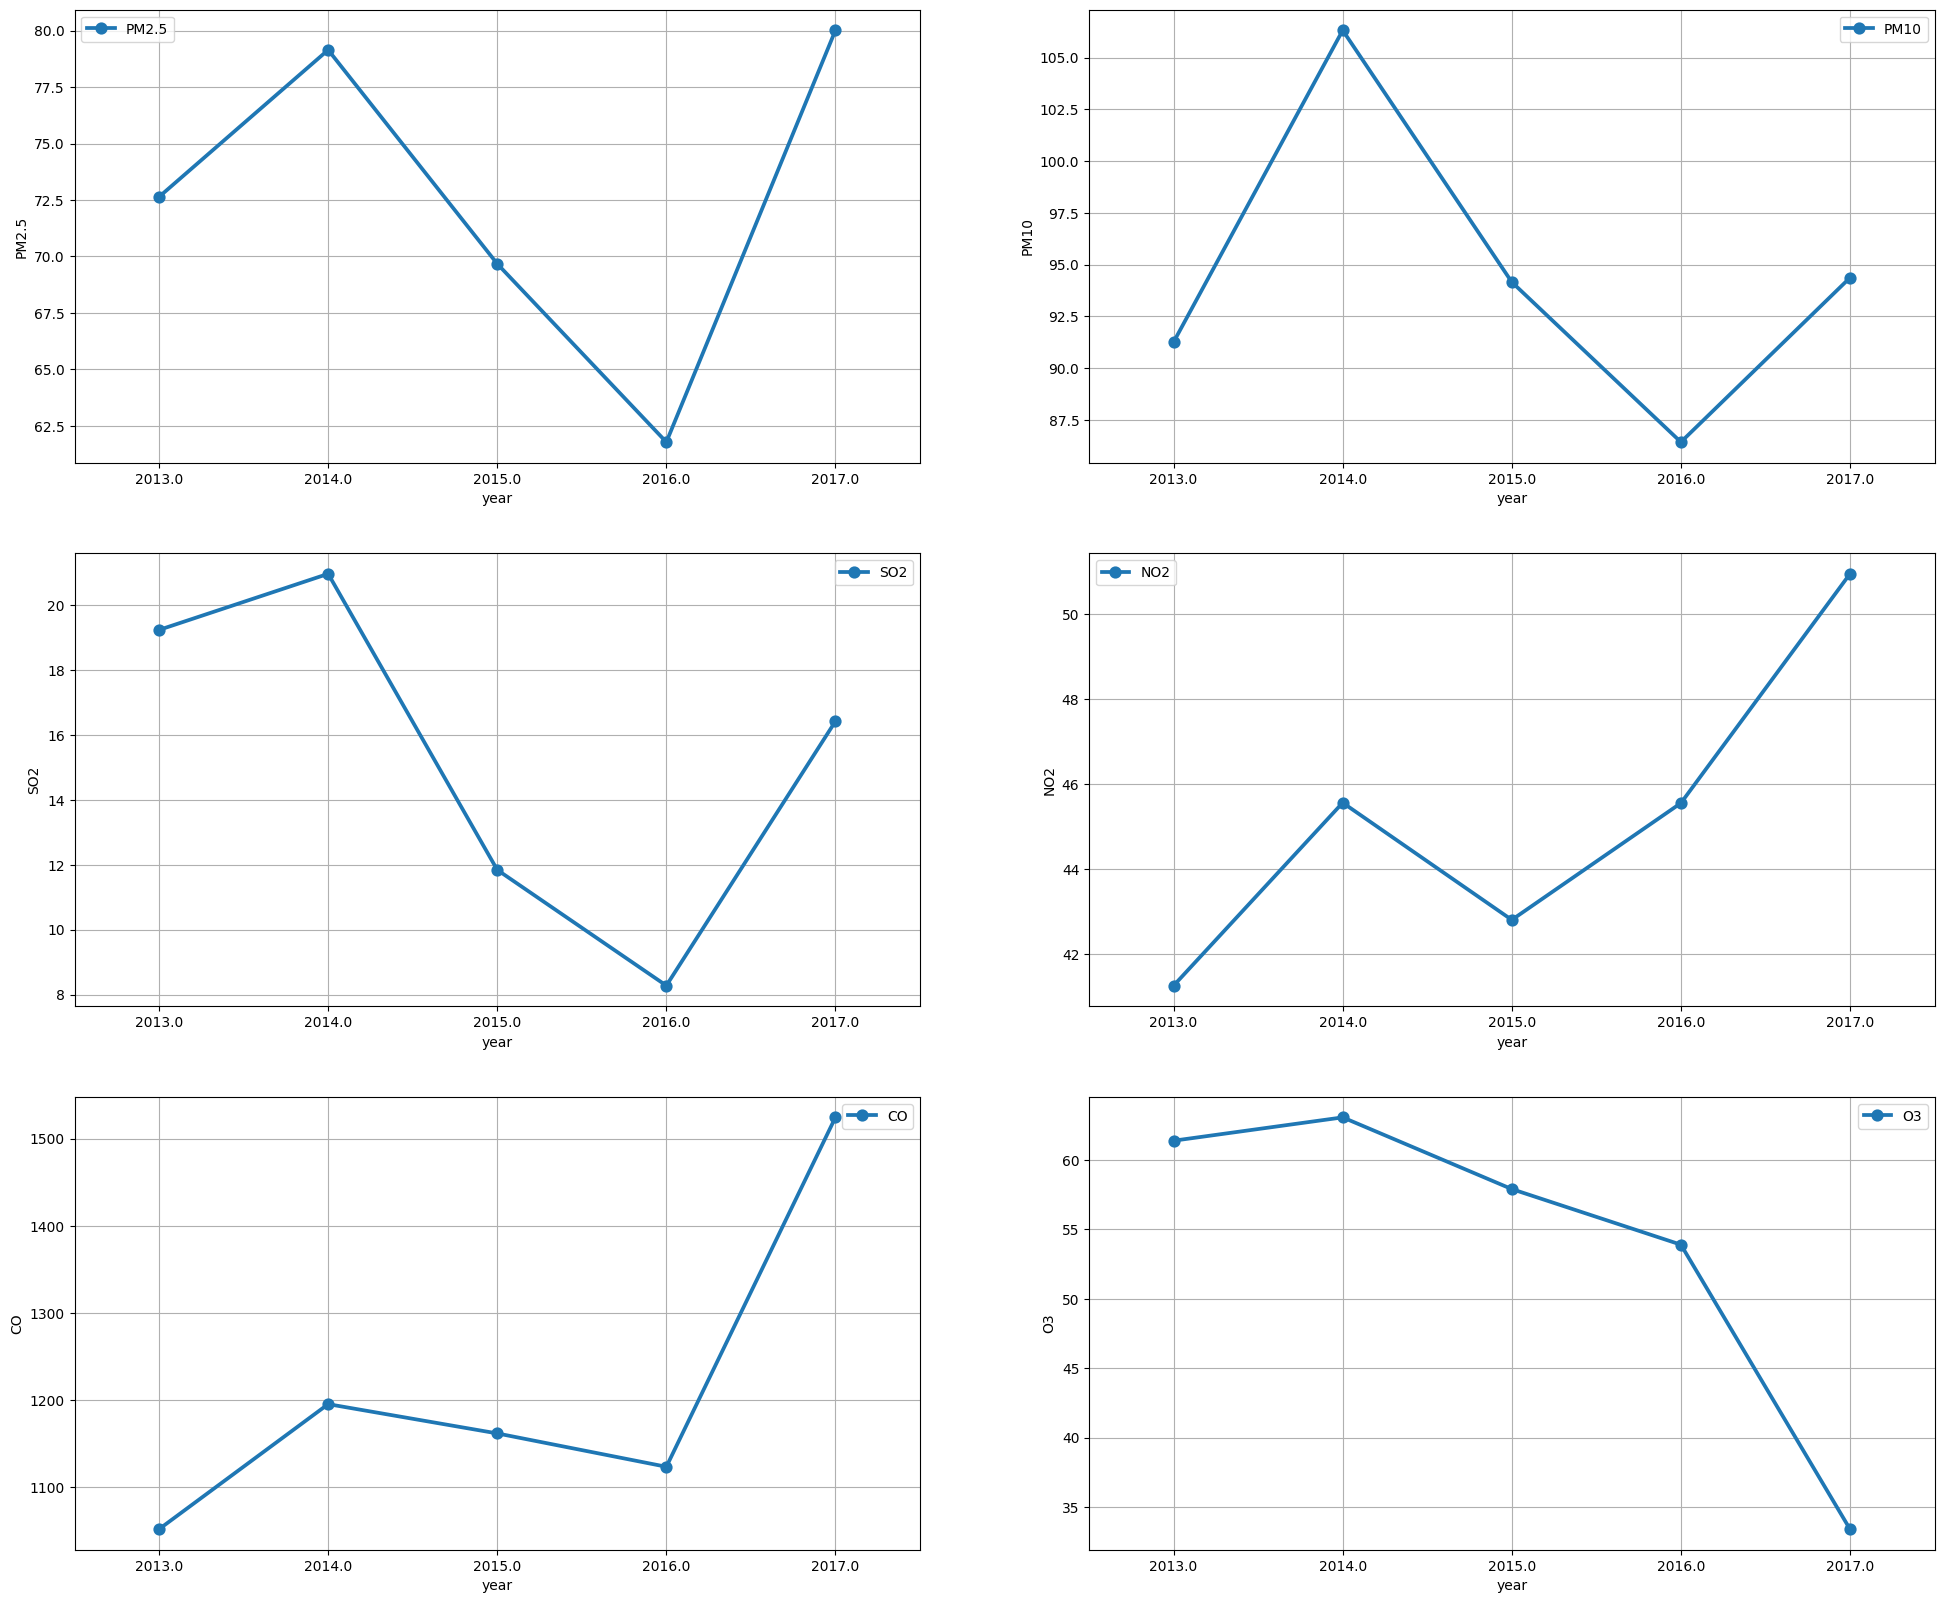

In [19]:
fig, ax = plt.subplots(nrows= 3, ncols= 2, figsize=(24, 20))
sns.pointplot(data= rata_rata_tahunan, x= 'year', y= 'PM2.5', label= 'PM2.5', errorbar= None, ax= ax[0, 0]).grid(True)
sns.pointplot(data= rata_rata_tahunan, x= 'year', y= 'PM10', label= 'PM10', errorbar= None, ax= ax[0, 1]).grid(True)
sns.pointplot(data= rata_rata_tahunan, x= 'year', y= 'SO2', label= 'SO2', errorbar= None, ax= ax[1, 0]).grid(True)
sns.pointplot(data= rata_rata_tahunan, x= 'year', y= 'NO2', label= 'NO2', errorbar= None, ax= ax[1, 1]).grid(True)
sns.pointplot(data= rata_rata_tahunan, x= 'year', y= 'CO', label= 'CO', errorbar= None, ax= ax[2, 0]).grid(True)
sns.pointplot(data= rata_rata_tahunan, x= 'year', y= 'O3', label= 'O3', errorbar= None, ax= ax[2, 1]).grid(True)
plt.show()

### Pertanyaan 3:

- Persentase hari dengan kualitas udara aman dan hari dengan kualitas udara melebihi batas aman


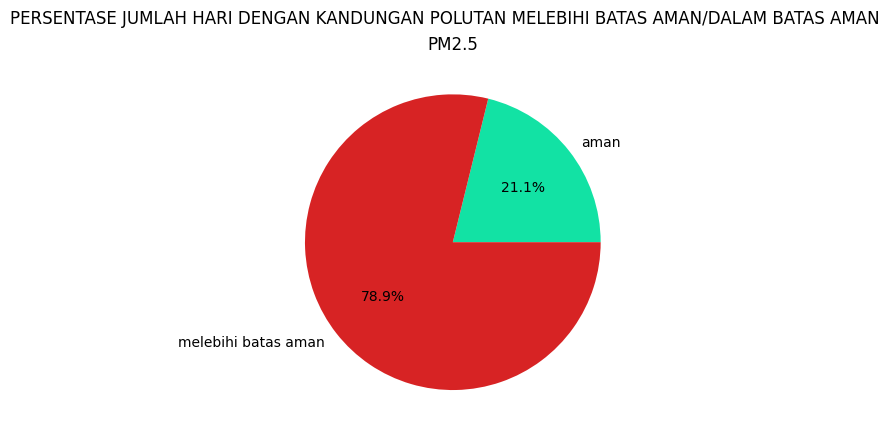

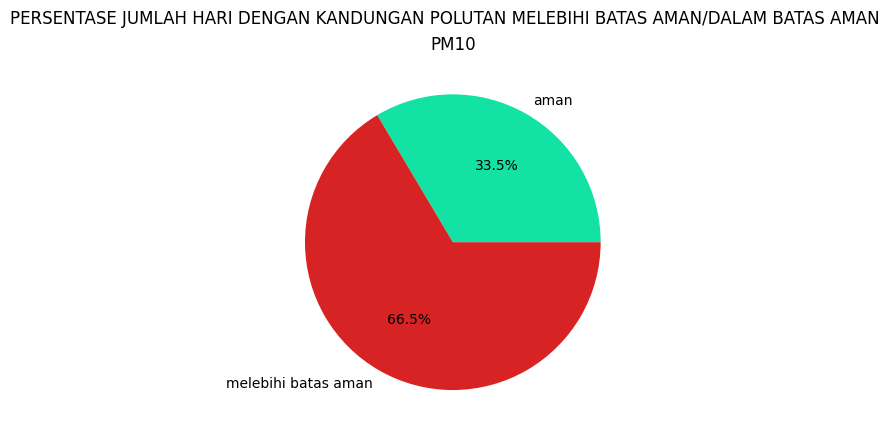

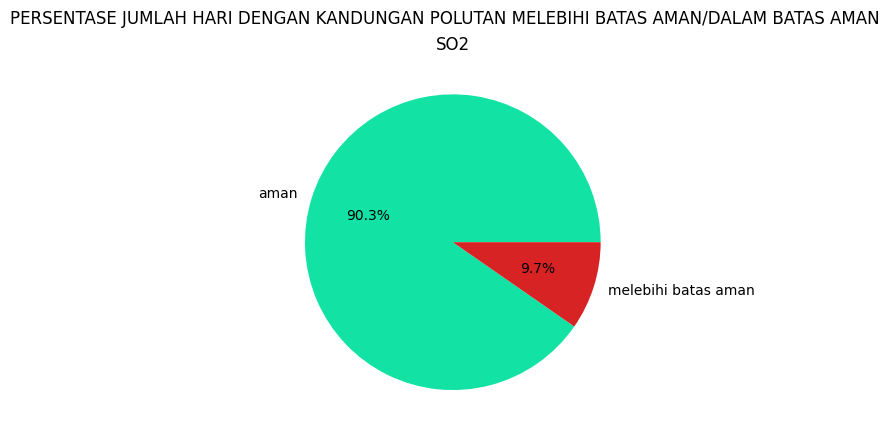

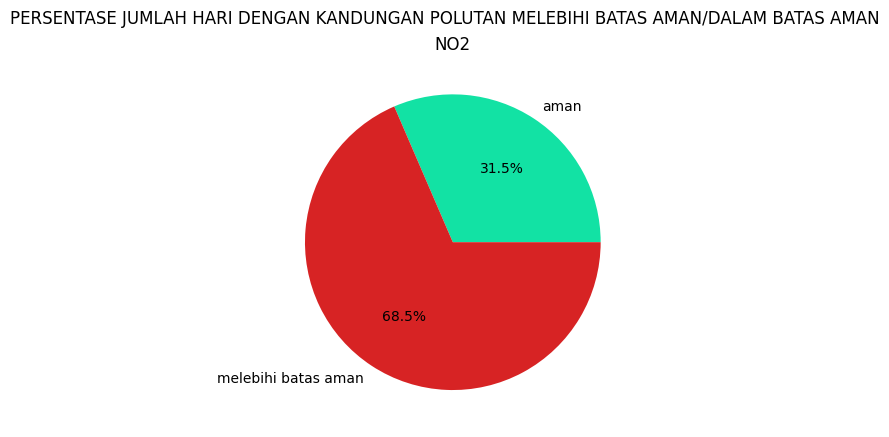

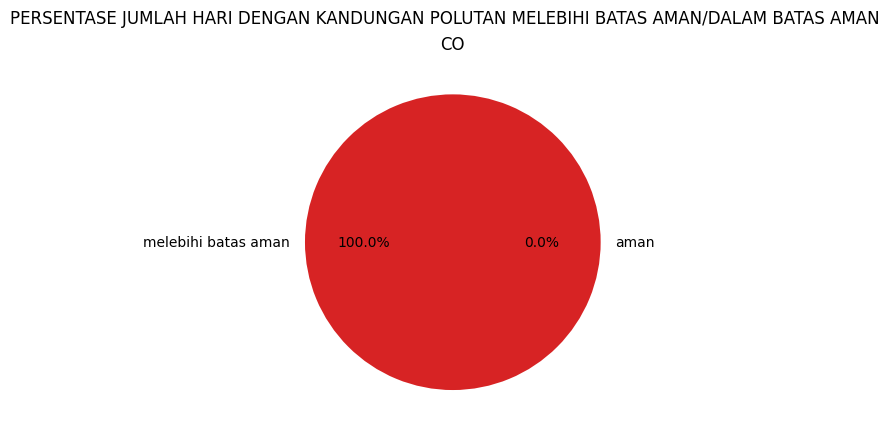

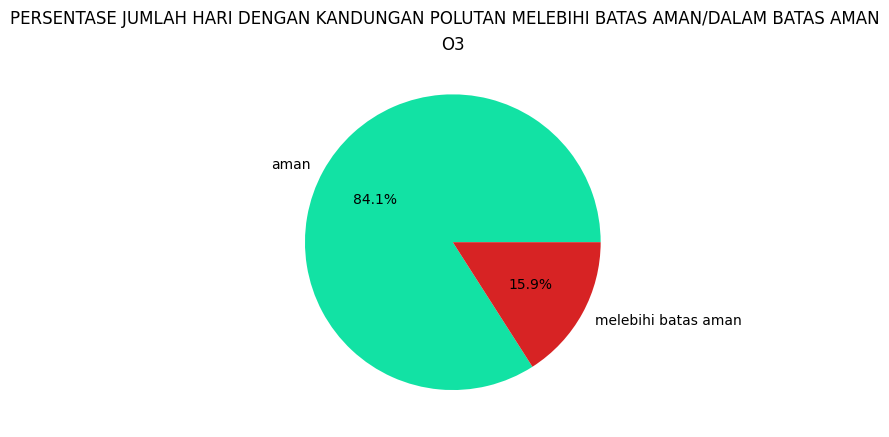

In [20]:
color = ('#12E2A4', '#D72324')

plt.pie(x= (persentase_hari_df['hari_DBA_Dalam_Batas_Aman'][0], persentase_hari_df['hari_melebihi_DBA'][0]), labels= ('aman', 'melebihi batas aman'), autopct='%1.1f%%', colors=color)    
plt.title('PM2.5')
plt.suptitle('PERSENTASE JUMLAH HARI DENGAN KANDUNGAN POLUTAN MELEBIHI BATAS AMAN/DALAM BATAS AMAN')
plt.show()

plt.pie(x= (persentase_hari_df['hari_DBA_Dalam_Batas_Aman'][1], persentase_hari_df['hari_melebihi_DBA'][1]), labels= ('aman', 'melebihi batas aman'), autopct='%1.1f%%',colors=color)
plt.title('PM10')
plt.suptitle('PERSENTASE JUMLAH HARI DENGAN KANDUNGAN POLUTAN MELEBIHI BATAS AMAN/DALAM BATAS AMAN')
plt.show()

plt.pie(x= (persentase_hari_df['hari_DBA_Dalam_Batas_Aman'][2], persentase_hari_df['hari_melebihi_DBA'][2]), labels= ('aman', 'melebihi batas aman'), autopct='%1.1f%%',colors=color)
plt.title('SO2')
plt.suptitle('PERSENTASE JUMLAH HARI DENGAN KANDUNGAN POLUTAN MELEBIHI BATAS AMAN/DALAM BATAS AMAN')
plt.show()

plt.pie(x= (persentase_hari_df['hari_DBA_Dalam_Batas_Aman'][3], persentase_hari_df['hari_melebihi_DBA'][3]), labels= ('aman', 'melebihi batas aman'), autopct='%1.1f%%',colors=color)
plt.title('NO2')
plt.suptitle('PERSENTASE JUMLAH HARI DENGAN KANDUNGAN POLUTAN MELEBIHI BATAS AMAN/DALAM BATAS AMAN')
plt.show()

plt.pie(x= (persentase_hari_df['hari_DBA_Dalam_Batas_Aman'][4], persentase_hari_df['hari_melebihi_DBA'][4]), labels= ('aman', 'melebihi batas aman'), autopct='%1.1f%%',colors=color)
plt.title('CO')
plt.suptitle('PERSENTASE JUMLAH HARI DENGAN KANDUNGAN POLUTAN MELEBIHI BATAS AMAN/DALAM BATAS AMAN')
plt.show()

plt.pie(x= (persentase_hari_df['hari_DBA_Dalam_Batas_Aman'][5], persentase_hari_df['hari_melebihi_DBA'][5]), labels= ('aman', 'melebihi batas aman'), autopct='%1.1f%%',colors=color)
plt.title('O3')
plt.suptitle('PERSENTASE JUMLAH HARI DENGAN KANDUNGAN POLUTAN MELEBIHI BATAS AMAN/DALAM BATAS AMAN')
plt.show()




**Insight:**

- Jawaban dari ketiga pertanyaan diatas divisualisasikan dengan jenis line chart dan pie chart. Alasan menggunakan line chart karena tren naik turun nilai nya lebih mudah dipahami, sedangkan alasan menggunakan pie chart karena pertanyaan yang bersifat kategoris sehingga lebih cocok jika memakai visualisasi pie chart.


## Analisis Lanjutan (Opsional)


## Conclusion

- Conclution pertanyaan 1

  Rincian nya sebagai berikut :

  - Rata-rata kandungan PM2.5 tertinggi ada pada pukul 20:00 dengan tingkat kandungan mencapai 77µg/m3
  - Rata-rata kandungan PM10 tertinggi ada pada pukul 20:00 dengan tingkat kandungan mencapai 111µg/m3
  - Rata-rata kandungan SO2 tertinggi ada pada pukul 10:00 dengan tingkat kandungan mencapai 19µg/m3
  - Rata-rata kandungan NO2 tertinggi ada pada pukul 20:00 dengan tingkat kandungan mencapai 52µg/m3
  - Rata-rata kandungan CO tertinggi ada pada pukul 09:00 dengan tingkat kandungan mencapai 1343µg/m3
  - Rata-rata kandungan O3 tertinggi ada pada pukul 16:00 dengan tingkat kandungan mencapai 97µg/m3

- Conclution pertanyaan 2

  - Rata-rata tahunan polutan PM2.5 sempat mengalami kenaikan pada tahun 2013 ke 2014 sebelum mengalami penurunan secara signifikan di rentang tahun 2014 sampai 2016. Tetapi setelah itu mengalami kenaikan lagi secara signifikan sampai pada tahun 2017.
  - Rata-rata tahunan polutan PM10 mengalami kenaikan pada tahun 2013 ke tahun 2014, kemudian mengalami penurunan dua tahun berturut-turut yaitu pada tahun 2015 dan 2016 sebelum naik kembali sampai tahun 2017.
  - Rata-rata tahunan polutan SO2 mengalami sedikit kenaikan dari tahun 2013 ke 2014 sebelum mengalami penurunan dua tahun berturut-turut pada tahun 2015 dan 2016. Namun kembali naik pada tahun 2107.
  - Rata-rata tahunan polutan NO2 hanya mengalami penurunan pada tahun 2014 ke 2015. Selain itu, pada tahun 2013 ke 2014 dan 2015 ke 2017 sama-sama mengalami kenaikan.
  - Rata-rata tahunan polutan CO mengalami kenaikan pada tahun 2013 ke 2014. Lalu sempat menurun pada tahun 2015 dan 2016 sebelum Kenaikan signifikan pada 2017.
  - Rata-rata tahunan polutan O3 mengalami kenaikan pada tahun 2013 ke 2014. Setelah itu mengalami penurunan hingga tahun 2017.

- Conclution pertanyaan 3

  - Hanya 21,1% dari total seluruh hari pada dataset yang rata-rata kandungan polutan PM2.5 nya masih dalam batas aman. Sedangkan sisanya 78,9% melebihi batas aman.
  - Hanya 33,5% dari total seluruh hari pada dataset memiliki rata-rata kandungan polutan PM10 masih dalam batas aman. Sedangkan sisanya 66,5% melebihi batas aman.
  - Hanya 9,7% dari total seluruh hari pada dataset memiliki rata-rata kandungan polutan SO2 masih dalam batas aman. Sedangkan sisanya 90,3% melebihi batas aman.
  - Hanya 31,5% dari total seluruh hari pada dataset memiliki rata-rata kandungan polutan NO2 masih dalam batas aman. Sedangkan sisanya 68,5% melebihi batas aman.
  - 100% atau total seluruh hari pada dataset memiliki rata-rata kandungan polutan CO melebihi batas aman.
  - Hanya 15,9% dari total seluruh hari pada dataset yang memiliki rata-rata kandungan polutan O3 yang melebihi batas aman. Sisanya 84,1% masih dalam batas aman.


## Export Clean Dataset


In [21]:
kualitas_udara_per_jam.to_csv("dashboard/kualitas_udara_per_jam_clean.csv", index= False)

In [22]:
rata_rata_tahunan.to_csv("dashboard/rata_rata_tahunan_clean.csv", index= False)

In [23]:
persentase_hari_df.to_csv("dashboard/persentase_hari_clean.csv", index= False)